## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [9]:
# Load data
import pandas as pd
df = pd.read_csv('airbnb_hw.csv')
filtered_df = df.loc[:, ['Price','Beds','Number Of Reviews','Review Scores Rating']]
print(filtered_df.shape)
filtered_df.head(20)

(30478, 4)


,Price,Beds,Number Of Reviews,Review Scores Rating
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0
5,149,1.0,4,100.0
6,250,1.0,9,100.0
7,90,1.0,80,94.0
8,270,2.0,95,90.0
9,290,2.0,23,96.0


In [10]:
# Clean price
filtered_df['Price'].value_counts()
filtered_df['Price'] = filtered_df['Price'].str.replace(',' , '')
filtered_df['Price'] = pd.to_numeric(filtered_df['Price'], errors = 'coerce')
filtered_df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [11]:
# Clean beds
filtered_df['Beds'] = filtered_df['Beds'].fillna(1)
filtered_df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
# No need to clean number of reviews

In [12]:
# Clean review score ratings
pd.crosstab(filtered_df['Review Scores Rating'].isnull() , filtered_df['Number Of Reviews'] > 0)

Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


It is shown that there are a decent amount of data missing due to no reviews. I will proceed by dropping all values in the df that are na.

In [13]:
# Remove all na data
filtered_df = filtered_df.dropna()
filtered_df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [15]:
# Maxmin normalize the data
def maxmin(x):
    u = (x-min(x))/ (max(x)-min(x))
    return u

normalized_df = filtered_df.drop('Price',axis=1)
normalized_df = normalized_df.apply(maxmin)

In [32]:
# Using K-Means to cluster data by Beds, Number of Reviews, and Reviews Score Rating for k = 6
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(normalized_df)
normalized_df['Cluster'] = model.labels_

In [33]:
normalized_df.describe()

,Beds,Number Of Reviews,Review Scores Rating,Cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,1.271361
std,0.065205,0.094954,0.110630,1.406285
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,0.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


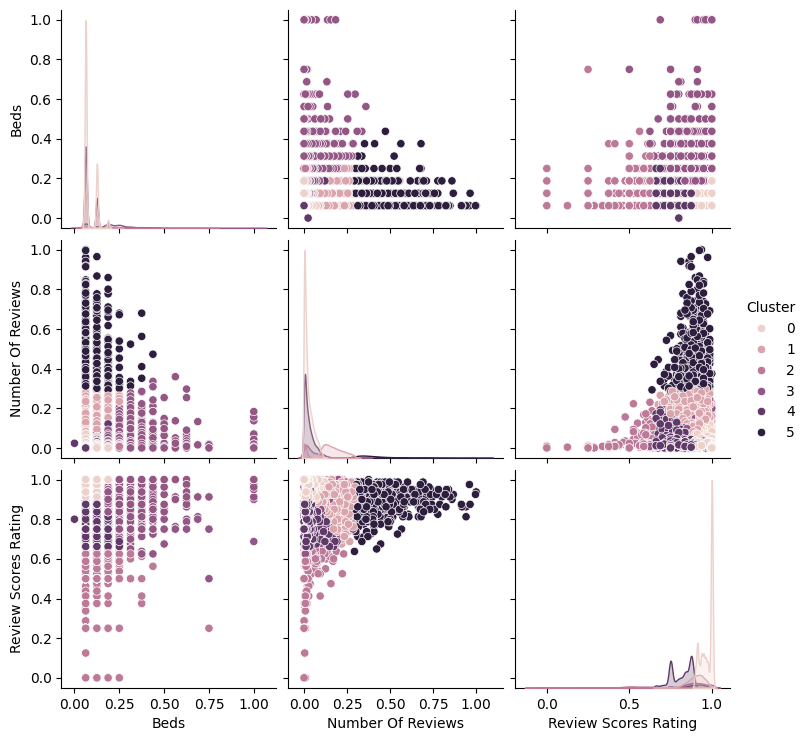

In [28]:
# Generating grid of scatterplots using seaborn
import seaborn as sns
sns.pairplot(data = normalized_df, hue = 'Cluster')

In [34]:
# Computing average price for each cluster
filtered_df['Cluster'] = model.labels_
filtered_df.loc[:, ['Price', 'Cluster']].groupby('Cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
Cluster                                                                       
0        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
1         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0
4          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
5          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0

Cluster 1 has the highest rental prices with a mean of approximately 293 per night. After this, the next two clusters that would be most expensive would be cluster 0 and cluster 3 with prices of 152 per night and 141 per night respectively.

Text(0.5, 1.0, 'Scree Plot')

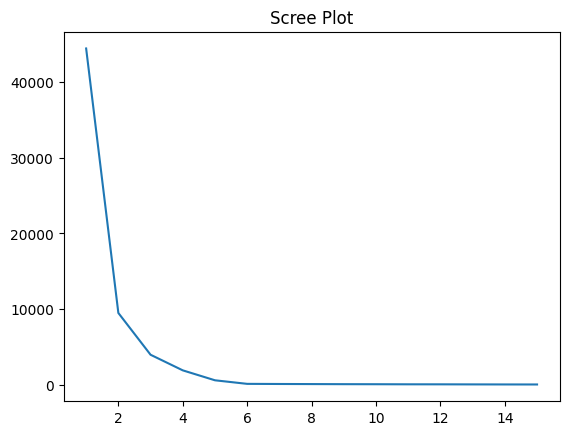

In [36]:
# Create scree plot
import numpy as np
k_range = 15
k_grid = np.arange(1, k_range + 1)
SSE = np.zeros(k_range)
# loop over the ks
for k in range(k_range):
    model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state = 0)
    model = model.fit(normalized_df)
    SSE[k] = model.inertia_

sns.lineplot(x = k_grid, y = SSE).set_title('Scree Plot')

From this graph, we can see that a k value of 2 or 3 would be good selection.

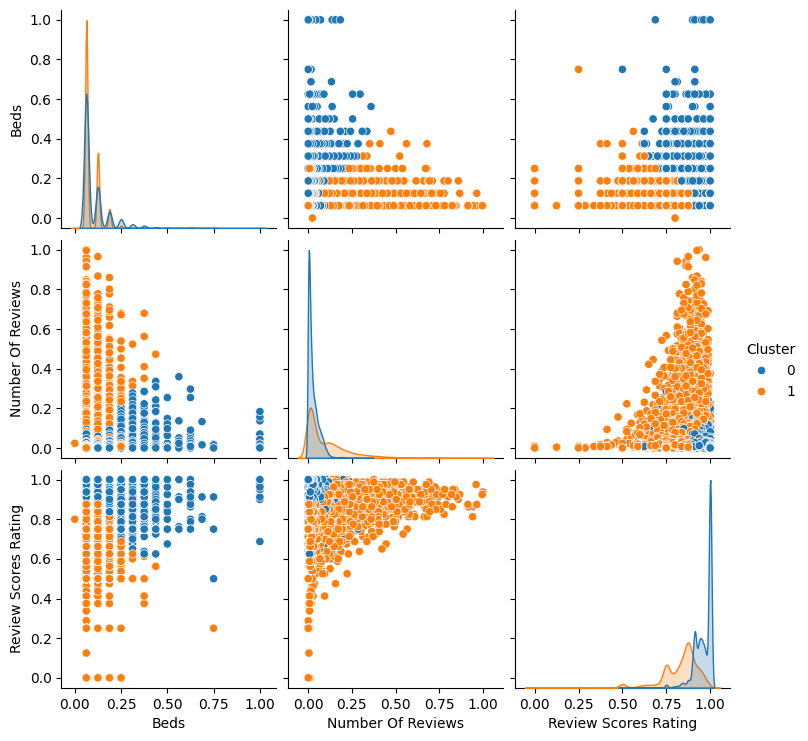

In [38]:
# Trying with k = 2
model = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(normalized_df)
normalized_df['Cluster'] = model.labels_
sns.pairplot(data=normalized_df, hue='Cluster')

In [39]:
filtered_df['Cluster'] = model.labels_
filtered_df.loc[:, ['Price','Cluster'] ].groupby('Cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        12145.0  171.222314  174.218757  10.0  90.0  140.0  200.0  10000.0
1        10010.0  134.847652  107.145902  20.0  79.0  115.0  170.0   5000.0

We can see that cluster 0 has the highest average rental price with 171 per night.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [40]:
# Create four datasets
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

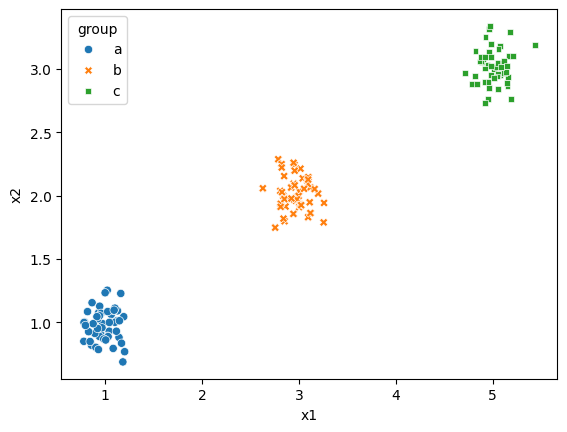

In [41]:
# Making scatterplot for noise level 0.125
sns.scatterplot(data = df0_125, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

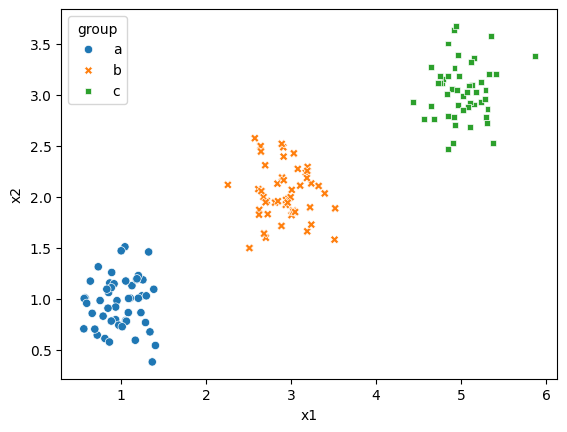

In [42]:
# Making scatterplot for noise level 0.25
sns.scatterplot(data = df0_25, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

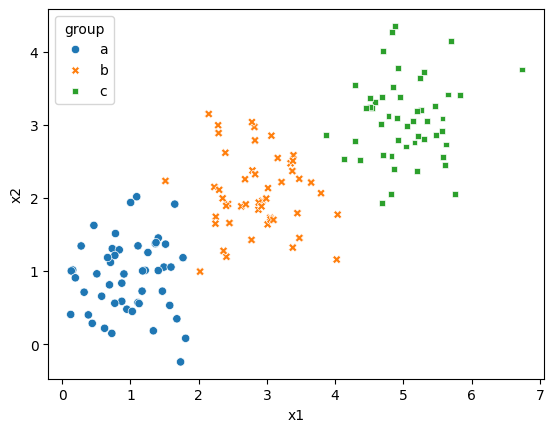

In [43]:
# Making scatterplot for noise level 0.5
sns.scatterplot(data = df0_5, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

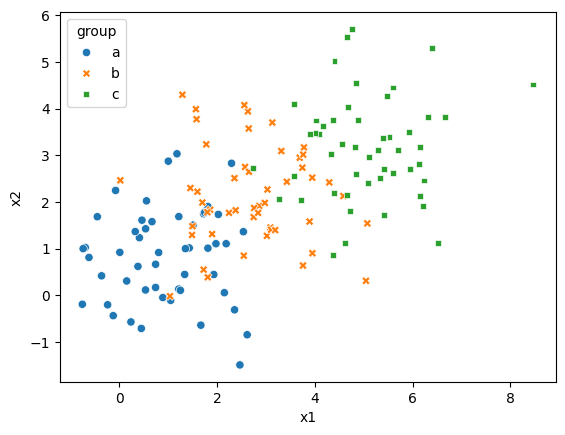

In [44]:
# Making scatterplot for noise level 1.0
sns.scatterplot(data = df1_0, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

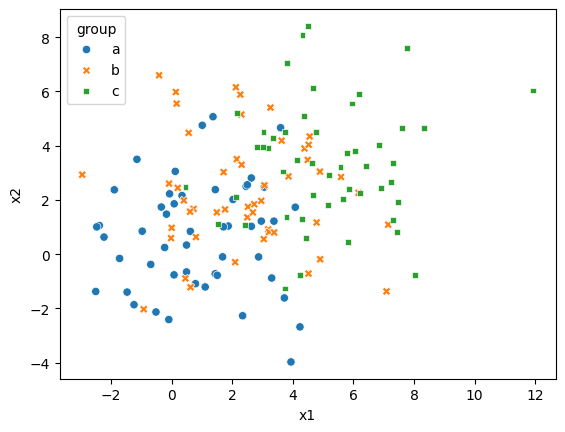

In [45]:
# Making scatterplot for noise level 2.0
sns.scatterplot(data = df2_0, x = 'x1', y='x2', hue='group', style='group')

As noise goes up from 0.125 to 2, the clusters all start to collide and spread out from one another in the graph.

In [49]:
# maxmin function
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

# Scree plot function
def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)

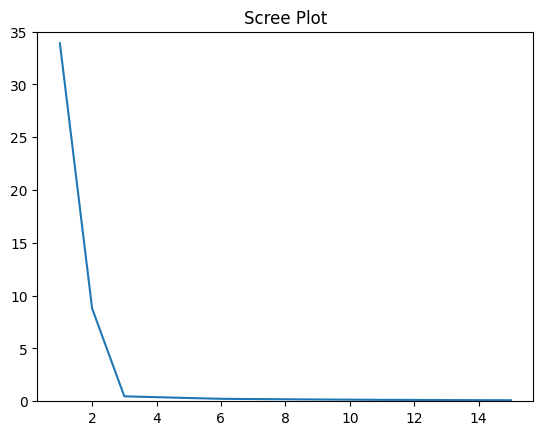

In [50]:
# generate scree plot for noise level of 0.125
scree(data = df0_125)

There is an elbow at k = 3

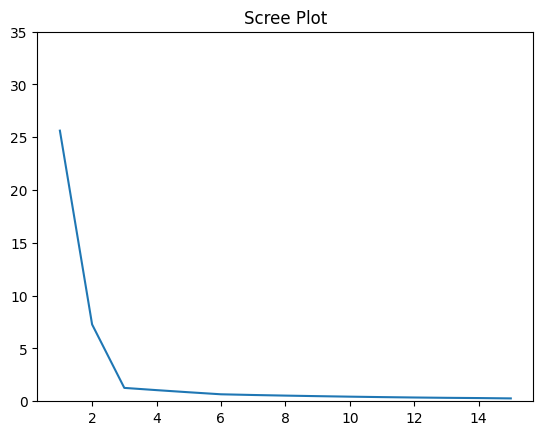

In [51]:
# generate scree plot for noise level of 0.25
scree(data = df0_25)

There is an elbow at k = 3

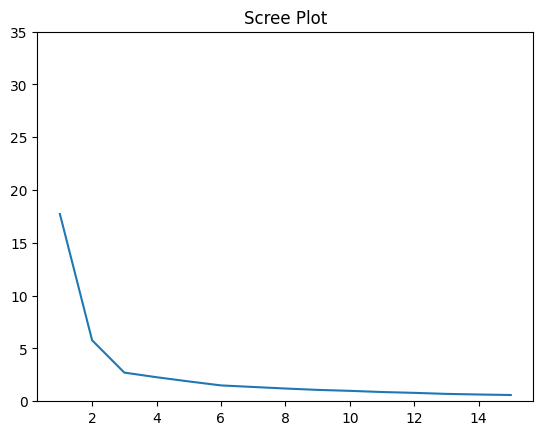

In [52]:
# generate scree plot for noise level of 0.5
scree(data = df0_5)

There is an elbow at k = 3

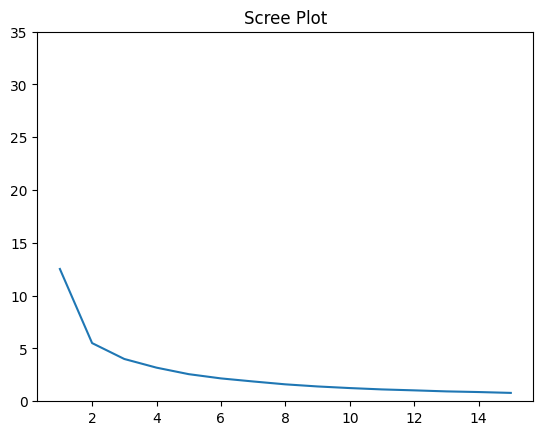

In [53]:
# generate scree plot for noise level of 1
scree(data = df1_0)

There is an elbow at k = 2

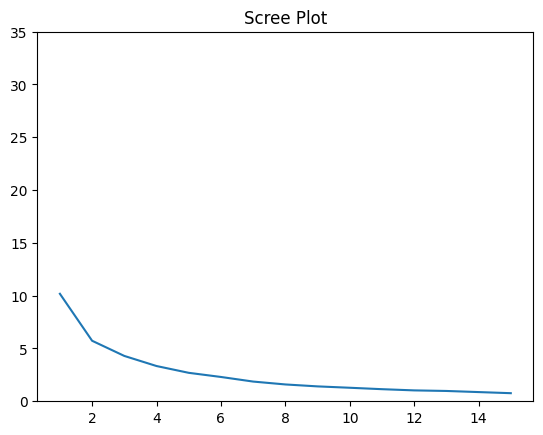

In [54]:
# generate scree plot for noise level of 2
scree(data = df2_0)

position of the elbow is not obvious

Intuition behind the elbows:

If the clusters are separate, the incremental advantage of introducing another cluster is substantial as it captures a noticeable decline in SSE. However, as noise levels increase, the clusters disperse, eventually becoming visually ambiguous. When clusters are distinct and visually discernible, the scree plot method proves effective and displays a prominent elbow. When clusters resemble a scattered collection of points, the scree plot displays a smooth curve with a not so prominent elbow.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?